In [1]:
%matplotlib  inline

Compute the discrete frequencies and wave spectral energies

In [2]:
from math import pi,tanh,sqrt,exp,log
import numpy as np
from matplotlib  import pyplot

Tp = 5.0 #s peak period
Hs = 2.0 #m significant wave height
d = Hs #m depth
fp = 1.0/Tp #peak  frequency
bandFactor = 2.0 #controls width of band  around fp
N = 101 # number of frequency bins
mwl = 0.0 #mean water level

extract discrete spectra

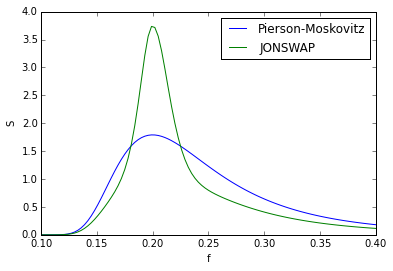

Hm0_PM 1.92450125458
Hm0_J 1.91828687069


In [3]:
fmax = bandFactor*fp
fmin = fp/bandFactor
df = (fmax-fmin)/float(N-1)
fi=np.zeros(N,'d')
for i in range(N):
    fi[i] = fmin+df*i
def piersonMoskovitz(f,f0=fp,alpha=8.1e-3,beta=0.74,g=9.8):
    return (5.0/16.0)*Hs**2*(f0**4/f**5)*np.exp((-5.0/4.0)*(f0/f)**4)
    #return (alpha*g**2/omega**5)*np.exp(-beta*(omega0/omega)**4)
def sigma(omega,omega0):
    sigmaReturn = omega.copy()
    sigmaReturn[:] = 0.07
    sigmaReturn[omega > omega0] = 0.09
    return sigmaReturn
def JONSWAP(f,f0=fp,Hs=Hs,g=9.8,gamma=3.3):
    omega = 2.0*pi*f
    omega0 = 2.0*pi*f0
    alpha = 2.0*pi*0.0624*(1.094-0.01915*log(gamma))/(0.23+0.0336*gamma-0.0185/(1.9+gamma))
    r = np.exp(- (omega-omega0)**2/(2*sigma(omega,omega0)**2*omega0**2))
    return (alpha*Hs**2*omega0**4/omega**5)*np.exp(-(5.0/4.0)*(omega0/omega)**4)*gamma**r
pyplot.plot(fi,piersonMoskovitz(fi,f0=fp),
            fi,JONSWAP(fi,f0=fp))
pyplot.xlabel('f')
pyplot.ylabel('S')
pyplot.legend(['Pierson-Moskovitz','JONSWAP'])
#pyplot.plot(fi,JONSWAP(fi,f0=fp))
pyplot.show()
Si_PM = piersonMoskovitz(fi,f0=fp)
Si_J = JONSWAP(fi,f0=fp)
Hm0_PM = 4.0*sqrt(df*piersonMoskovitz(fi).sum())
print "Hm0_PM",Hm0_PM
Hm0_J = 4.0*sqrt(df*JONSWAP(fi).sum())
print "Hm0_J",Hm0_J

Solve dispersion relations for ki

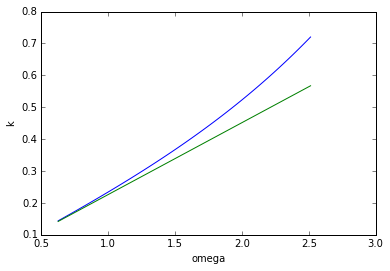

In [4]:
def dispersion(w,d, niter = 1000, g = 9.81):
# This function calculates k from linear dispersion relation
# d = depth, w is cyclical frequency and niter is the number of solution iteration (default = 1000)
    Kd = w*sqrt(d/g)
    for jj in range(niter):
        #Kdn_1 = Kd
        Kd = w*w*d/g/np.tanh(Kd)
        #Kdn_1 /=0.01*Kd
        #Kdn_1 -= 100.
        #Kdn_1 = abs(Kdn_1)
        #try: Kdn_1 = mean(Kdn_1)
        #except: continue
    #print "Solution convergence for dispersion relation %s percent" % Kdn_1
    return(Kd/d)
ki = dispersion(2.0*pi*fi,d)
pyplot.plot(fi*2.0*pi,ki,fi*2.0*pi,fi*2.0*pi/sqrt(9.81*d))
pyplot.xlabel('omega')
pyplot.ylabel('k')

[ 5.10534148  5.52650305  2.71323707  3.4130669   1.55372859  5.45298088
  2.62773475  1.62851247  0.37832447  4.15702341  5.80223951  4.01617638
  3.3715919   1.63158244  2.63031425  1.37129649  3.59457398  5.18753811
  2.64917511  3.5041422   5.91061199  3.42739985  2.10632652  5.38980305
  2.80241815  0.72645121  6.14876416  6.0535503   1.46645541  5.2500601
  3.90097466  2.53952854  0.51200205  4.98310593  1.21012389  3.80403961
  3.34836821  5.67926041  4.29385562  5.85085757  1.30679656  3.26588807
  3.81575205  3.83108065  0.46879316  1.43896775  3.15164291  5.32477071
  4.26963684  1.77328745  6.10234091  2.16242507  3.31935424  3.22646901
  4.0590021   4.59885686  2.24650349  0.12642733  1.86069801  1.1127707
  3.5239009   3.97764878  1.02371923  4.68984509  4.39735856  1.16679699
  5.41872474  3.10139908  1.58162049  2.35183465  4.70709546  0.19069424
  4.98911099  3.17691195  4.42272503  0.3511489   2.37007499  4.65338198
  3.41834647  1.74419137  2.78413364  5.48988464  2.3

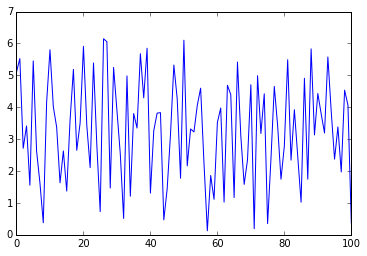

In [5]:
phi = 2.0*pi*np.random.random(fi.shape[0])
print phi
pyplot.plot(phi)

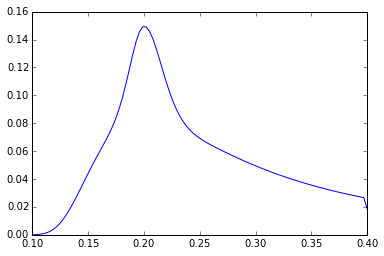

In [6]:
ai = np.sqrt((Si_J[1:]+Si_J[:-1])*(fi[1:]-fi[:-1]))
fim = (0.5*(fi[1:]+fi[:-1])).tolist()
fim = np.array([fim[0]-0.5*df]+fim+[fim[-1]+0.5*df])
Si_Jm = JONSWAP(fim)
ai = np.sqrt((Si_Jm[1:]+Si_Jm[:-1])*(fim[1:]-fim[:-1]))
pyplot.plot(fi,ai)

In [7]:
def eta(x,t):
    return (ai*np.cos(2.0*pi*fi*t - ki*x + phi)).sum()
def u(x,z,t):
    Z = z - mwl
    return (2.0*pi*fi*ai*np.cos(2.0*pi*fi*t-ki*x+phi)*np.cosh(ki*(d+Z))/np.sinh(ki*d)).sum()
def w(x,z,t):
    Z = z - mwl
    return (2.0*pi*fi*ai*np.sin(2.0*pi*fi*t-ki*x+phi)*np.sinh(ki*(d+Z))/np.sinh(ki*d)).sum()

[[ 1.72508809  1.7905412   1.73880745 ...,  0.13781305  0.11437949
   0.0996604 ]
 [ 1.77799929  1.84017991  1.78668983 ...,  0.14595361  0.12192466
   0.10647702]
 [ 1.83352736  1.89241594  1.83710881 ...,  0.15459397  0.12990408
   0.11369022]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
[[ 0.87098104  0.98175737  1.18173411 ...,  0.48963041  0.5500871
   0.59468672]
 [ 0.91358803  1.02779193  1.22772237 ...,  0.51235571  0.57060442
   0.61304698]
 [ 0.95740755  1.07530295  1.27556634 ...,  0.53604463  0.59211596
   0.63237505]
 ..., 
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
[[ 0.42687484

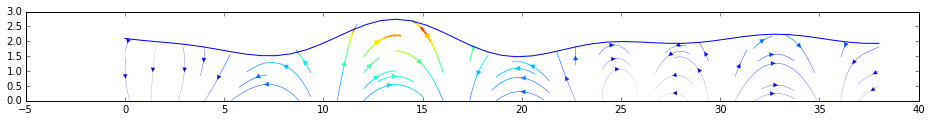

In [8]:
!rm frame*.png
import numpy as  np
from matplotlib  import pyplot
kp = dispersion(2.0*pi*fp,d)
nn = 51
zmax = d+1.8*Hs/2.0
xmax = 10*zmax
x = np.linspace(0,xmax,nn)
z = np.linspace(0,zmax,nn)
X,Z = np.meshgrid(x,z)
U = np.zeros((nn,nn),'d')
W = np.zeros((nn,nn),'d')
T=0.0
L = 6.0*pi/kp
T_end = Tp
nt = 3
for n,T in enumerate(np.linspace(0,Tp,nt)):
    #UIJ = u(X,Z,T)
    #WIJ = w(X,Z,T)
    #Z_surf = eta(X,T)
    #UIJ[Z > Z_surf]=0.0
    #WIJ[Z > Z_surf]=0.0
    for J,xi in enumerate(x):
        for I,zi in enumerate(z):
            z_surf = d+eta(xi,T)
            if zi < z_surf:
                UIJ = u(xi,zi,T)
                WIJ = w(xi,zi,T)
                U[I,J] =  UIJ
                W[I,J] = WIJ
            else:
                U[I,J] = 0.0
                W[I,J] = 0.0
    speed = np.sqrt(U*U + W*W)
    print speed
    hl = [d+eta(xi,T) for xi in x]
    pyplot.clf()
    #pyplot.axis('equal')
    pyplot.plot(x,hl)
    pyplot.streamplot(x, z, U, W,density=(1,1), color=speed,linewidth=2.5*speed/speed.max())
    #pyplot.contourf(x,z,speed)
    fig = pyplot.gcf()
    fig.set_size_inches(16.0,16.0*zmax/xmax)
    pyplot.savefig('frame%4.4d.png' % n)

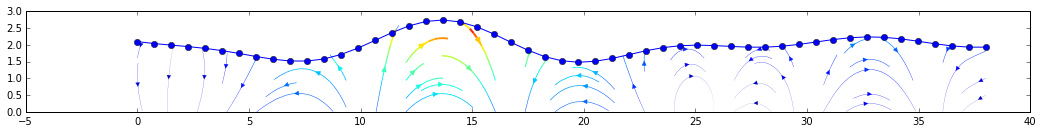

In [9]:
pyplot.clf()
fig = pyplot.figure(frameon=False)
#pyplot.axis('equal')
pyplot.plot(x,hl,'o-')
pyplot.streamplot(x, z, U, W,density=(1,1), color=speed,linewidth=2.5*speed/speed.max())
#pyplot.contourf(x,z,speed)
#pyplot.ylim(0,d+1.8*Hs/2.0)
#pyplot.xlim(0,4*(d+1.8*Hs/2.0))
#pyplot.axis('scaled')
fig.set_size_inches(18.0,18.0*zmax/xmax)
pyplot.show()
#pyplot.axis('scaled')
#pyplot.axis('tight')
#pyplot.savefig('frame%4.4d.png' % n)

In [10]:
import subprocess
!avconv -y -i frame%4d.png -c libx264 -qscale 1 -vf "setpts=N/(2*TB)" -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2"  random.mp4
#subprocess.call(r"ffmpeg -r 1 -y -i frame%4d.png -vcodec libx264 -sameq stokes3.mp4",shell=True)

avconv version 9.18-6:9.18-0ubuntu0.14.04.1, Copyright (c) 2000-2014 the Libav developers
  built on Mar 16 2015 13:19:10 with gcc 4.8 (Ubuntu 4.8.2-19ubuntu1)
Input #0, image2, from 'frame%4d.png':
  Duration: 00:00:00.12, start: 0.000000, bitrate: N/A
    Stream #0.0: Video: png, bgra, 1152x115, 25 tbr, 25 tbn
[libx264 @ 0x1817340] using cpu capabilities: MMX2 SSE2Fast SSSE3 SSE4.2 AVX
[libx264 @ 0x1817340] profile High, level 2.1
[libx264 @ 0x1817340] 264 - core 142 r2389 956c8d8 - H.264/MPEG-4 AVC codec - Copyleft 2003-2014 - http://www.videolan.org/x264.html - options: cabac=1 ref=3 deblock=1:0:0 analyse=0x3:0x113 me=hex subme=7 psy=1 psy_rd=1.00:0.00 mixed_ref=1 me_range=16 chroma_me=1 trellis=1 8x8dct=1 cqm=0 deadzone=21,11 fast_pskip=1 chroma_qp_offset=-2 threads=6 lookahead_threads=1 sliced_threads=0 nr=0 decimate=1 interlaced=0 bluray_compat=0 constrained_intra=0 bframes=3 b_pyramid=2 b_adapt=1 b_bias=0 direct=1 weightb=1 open_gop=0 weightp=2 keyint=250 keyint_min=25 scenecut

In [1]:
from IPython.core.display import HTML
data_uri_mp4 = open("random.mp4", "rb").read().encode("base64").replace("\n", "")
video_tag = """<video controls>
<source type ="video/mp4" src="data:video/mp4;base64,{mp4}"/>
Your browser does not support the video tag
</video>""".format(mp4=data_uri_mp4)
HTML(data=video_tag)

In [12]:
Tp = 10.0/fp
print Tp

50.0
